In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, precision_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [12]:
df = pd.read_csv('dataset.csv')
df.columns = [i for i in range(df.shape[1])]
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.777649,0.602113,-7.357480e-07,0.690330,0.586939,-0.009666,0.628086,0.500407,-0.007405,0.606568,...,0.768731,0.353262,-0.030688,0.766042,0.418597,-0.018675,0.767647,0.461124,-0.003030,A
1,0.796097,0.569603,-7.971800e-07,0.703921,0.569960,-0.016479,0.631427,0.472841,-0.016110,0.605592,...,0.785815,0.310757,-0.041686,0.783228,0.384469,-0.029622,0.783120,0.430004,-0.012673,A
2,0.844594,0.541138,-7.916192e-07,0.751934,0.553412,-0.022217,0.668399,0.446479,-0.021382,0.633709,...,0.838056,0.266975,-0.045916,0.840066,0.345109,-0.034617,0.838038,0.395606,-0.016875,A
3,0.859726,0.519927,-6.950327e-07,0.774968,0.539694,-0.030743,0.690821,0.436099,-0.032946,0.656740,...,0.859386,0.269224,-0.055243,0.863014,0.344463,-0.047601,0.856832,0.392848,-0.030902,A
4,0.829315,0.535592,-7.036035e-07,0.743812,0.550641,-0.020807,0.665488,0.465790,-0.021255,0.630022,...,0.806156,0.298809,-0.036986,0.810339,0.366690,-0.025273,0.813396,0.404595,-0.009107,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,0.823392,0.854916,-5.970996e-07,0.763148,0.744947,-0.013444,0.745635,0.619549,-0.020710,0.749918,...,0.868429,0.753256,-0.067176,0.855052,0.767599,-0.062602,0.857363,0.765209,-0.056262,Like
275,0.824285,0.879250,-8.508503e-07,0.775932,0.769961,-0.029470,0.773827,0.640120,-0.039249,0.784036,...,0.964071,0.793176,-0.071053,0.922711,0.809590,-0.066194,0.900632,0.808190,-0.057565,Like
276,0.831142,0.884350,-8.672244e-07,0.778732,0.773825,-0.028637,0.772979,0.644008,-0.033166,0.781403,...,0.960590,0.767608,-0.050361,0.911926,0.793211,-0.044773,0.896057,0.791331,-0.035319,Like
277,0.847800,0.876877,-1.055902e-06,0.778518,0.754779,-0.020688,0.771779,0.623676,-0.024604,0.785060,...,0.938966,0.748684,-0.042789,0.898403,0.770804,-0.041137,0.877756,0.767181,-0.037435,Like


In [13]:
df = df.rename(columns={63: 'Output'})
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,Output
0,0.777649,0.602113,-7.357480e-07,0.690330,0.586939,-0.009666,0.628086,0.500407,-0.007405,0.606568,...,0.768731,0.353262,-0.030688,0.766042,0.418597,-0.018675,0.767647,0.461124,-0.003030,A
1,0.796097,0.569603,-7.971800e-07,0.703921,0.569960,-0.016479,0.631427,0.472841,-0.016110,0.605592,...,0.785815,0.310757,-0.041686,0.783228,0.384469,-0.029622,0.783120,0.430004,-0.012673,A
2,0.844594,0.541138,-7.916192e-07,0.751934,0.553412,-0.022217,0.668399,0.446479,-0.021382,0.633709,...,0.838056,0.266975,-0.045916,0.840066,0.345109,-0.034617,0.838038,0.395606,-0.016875,A
3,0.859726,0.519927,-6.950327e-07,0.774968,0.539694,-0.030743,0.690821,0.436099,-0.032946,0.656740,...,0.859386,0.269224,-0.055243,0.863014,0.344463,-0.047601,0.856832,0.392848,-0.030902,A
4,0.829315,0.535592,-7.036035e-07,0.743812,0.550641,-0.020807,0.665488,0.465790,-0.021255,0.630022,...,0.806156,0.298809,-0.036986,0.810339,0.366690,-0.025273,0.813396,0.404595,-0.009107,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,0.823392,0.854916,-5.970996e-07,0.763148,0.744947,-0.013444,0.745635,0.619549,-0.020710,0.749918,...,0.868429,0.753256,-0.067176,0.855052,0.767599,-0.062602,0.857363,0.765209,-0.056262,Like
275,0.824285,0.879250,-8.508503e-07,0.775932,0.769961,-0.029470,0.773827,0.640120,-0.039249,0.784036,...,0.964071,0.793176,-0.071053,0.922711,0.809590,-0.066194,0.900632,0.808190,-0.057565,Like
276,0.831142,0.884350,-8.672244e-07,0.778732,0.773825,-0.028637,0.772979,0.644008,-0.033166,0.781403,...,0.960590,0.767608,-0.050361,0.911926,0.793211,-0.044773,0.896057,0.791331,-0.035319,Like
277,0.847800,0.876877,-1.055902e-06,0.778518,0.754779,-0.020688,0.771779,0.623676,-0.024604,0.785060,...,0.938966,0.748684,-0.042789,0.898403,0.770804,-0.041137,0.877756,0.767181,-0.037435,Like


In [14]:
X = df.iloc[:, :-1]
print("Features shape =", X.shape)

Y = df.iloc[:, -1]
print("Labels shape =", Y.shape)

Features shape = (279, 63)
Labels shape = (279,)


In [15]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
svm = SVC(C=10, gamma=0.1, kernel='rbf')
svm.fit(x_train, y_train)

SVC(C=10, gamma=0.1)

In [16]:
y_pred = svm.predict(x_test)
y_pred

array(['Heart', 'Heart', 'Like', 'A', 'B', 'Heart', 'Like', 'E', 'Heart',
       'C', 'E', 'B', 'D', 'D', 'C', 'C', 'A', 'Like', 'B', 'B', 'D', 'A',
       'A', 'A', 'C', 'B', 'E', 'A', 'E', 'D', 'E', 'B', 'A', 'C',
       'Heart', 'Heart', 'E', 'D', 'C', 'B', 'E', 'D', 'Like', 'Like',
       'Like', 'Like', 'D', 'C', 'B', 'D', 'Like', 'D', 'A', 'D', 'Heart',
       'E'], dtype=object)

In [17]:
cf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
precision = precision_score(y_test, y_pred, average='micro')
acc = accuracy_score(y_test, y_pred)
acc, f1, recall, precision

(0.9642857142857143,
 0.9642857142857143,
 0.9642857142857143,
 0.9642857142857143)

<Axes: title={'center': 'Confusion Matrix - American Sign Language'}>

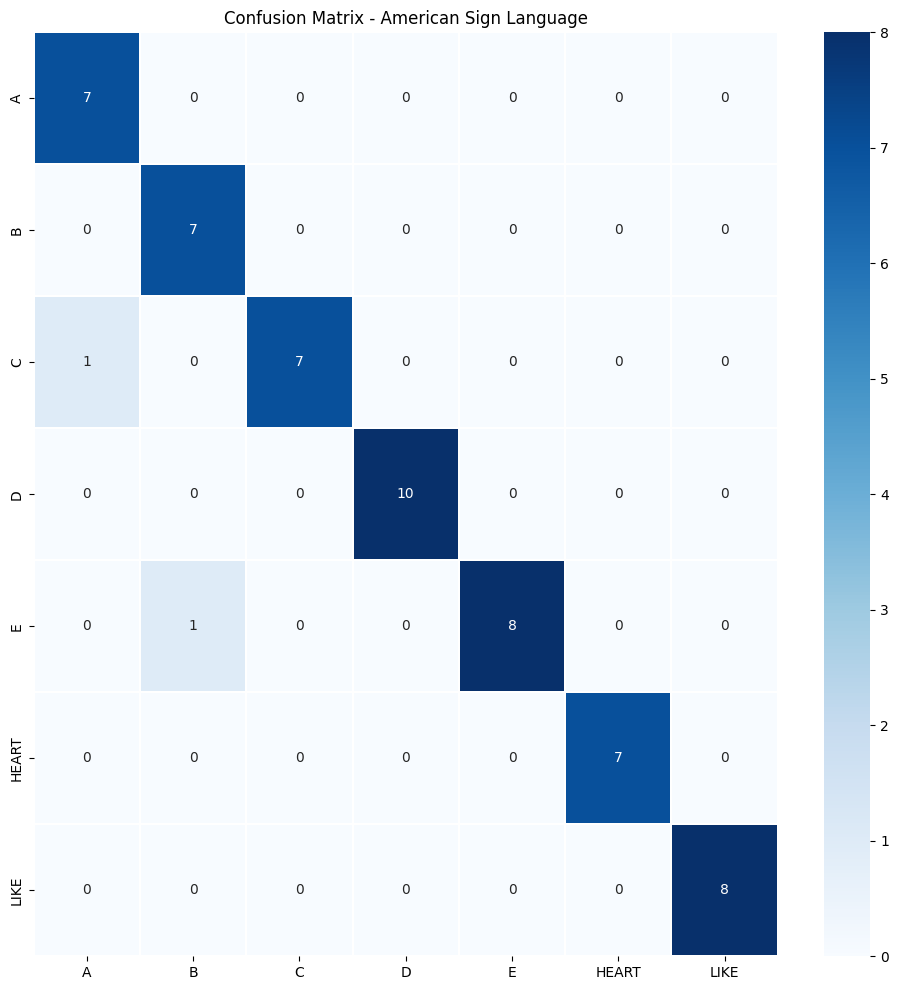

In [18]:
labels = sorted(list(set(df['Output'])))
labels = [x.upper() for x in labels]

fig, ax = plt.subplots(figsize=(12, 12))

ax.set_title("Confusion Matrix - American Sign Language")

maping = sns.heatmap(cf_matrix, 
                     annot=True,
                     cmap = plt.cm.Blues, 
                     linewidths=.2,
                     xticklabels=labels,
                     yticklabels=labels, vmax=8,
                     fmt='g',
                     ax=ax
                    )
maping

In [19]:
import pickle

# save model
with open('model_1.pkl','wb') as f:
    pickle.dump(svm,f)